In [ ]:
cd CubeSat_ImageClassify  

## Loading the Dataset

In [61]:
import numpy as np

# Load the datasets
train_images = np.load('data/train_images.npy')
train_labels = np.load('data/train_labels.npy')


## CubeSat CNN Model

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
)
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# One-hot encode the labels (5 classes as required)
train_labels = to_categorical(train_labels, num_classes=5)

# Define a more efficient and lighter CNN model
model = Sequential([
    # Depthwise Separable Convolution
    SeparableConv2D(8, (3, 3), activation='relu', input_shape=(256, 256, 3)),  
    MaxPooling2D((2, 2)),

    SeparableConv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    SeparableConv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),  # Reduces parameters
    Dense(5, activation='softmax')  # Output layer adjusted for 5 classes
])

# Define an exponential decay learning rate schedule
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,  # Number of steps before decaying
    decay_rate=0.96,  # Rate at which the learning rate decays
    staircase=True  # Decays at discrete intervals
)

# Compile the model with the learning rate schedule
optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print("Optimized Model defined and compiled successfully.")

# Implement early stopping to save training time
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with optimized settings
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=32,  # Lowered batch size to reduce memory use
    validation_split=0.2,  # Added validation split for better monitoring
    callbacks=[early_stopping]  # Apply early stopping to stop training once the model stops improving
)

print("Model training complete.")


/shared/venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_separable_conv.py:104: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Optimized Model defined and compiled successfully.
Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 303s 1s/step - accuracy: 0.3418 - loss: 1.3930 - val_accuracy: 0.8466 - val_loss: 0.6495
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 298s 1s/step - accuracy: 0.9147 - loss: 0.4590 - val_accuracy: 0.9465 - val_loss: 0.2333
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9755 - loss: 0.1631 - val_accuracy: 0.9840 - val_loss: 0.0873
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.9855 - loss: 0.0924 - val_accuracy: 0.9825 - val_loss: 0.1067
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 294s 1s/step - accuracy: 0.9880 - loss: 0.0703 - val_accuracy: 0.9892 - val_loss: 0.0479
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.9903 - loss: 0.0502 - val_accuracy: 0.9938 - val_loss: 0.0320
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 297s 1s/step - accuracy: 0.9928 - loss: 0.0352 - val_accuracy: 0.9866 - val_loss: 0.0406
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 296s 1

## Explanation of Code

In this code, we define and train an optimized Convolutional Neural Network (CNN) model using TensorFlow/Keras for a classification task.

### Key Steps:

1. **One-Hot Encoding Labels**:
   - We convert the target labels (`train_labels`) into a one-hot encoded format suitable for multi-class classification with 5 classes.

2. **Model Definition**:
   - A **Sequential model** is defined with layers:
     - **SeparableConv2D**: A depthwise separable convolution layer that reduces computational complexity.
     - **MaxPooling2D**: Downsampling layer to reduce spatial dimensions.
     - **GlobalAveragePooling2D**: Reduces the number of parameters by averaging the feature maps.
     - **Dense**: Output layer with 5 units and softmax activation for classification.
   
3. **Learning Rate Scheduling**:
   - An **ExponentialDecay** learning rate schedule is used to gradually reduce the learning rate during training, helping the model converge faster and avoid overshooting the optimal solution.

4. **Model Compilation**:
   - The model is compiled with the **Adam optimizer** and **categorical crossentropy** loss function, suitable for multi-class classification.

5. **Early Stopping**:
   - We implement **early stopping** to halt training once the model stops improving on the validation set, preventing overfitting and saving training time.

6. **Model Training**:
   - The model is trained for a maximum of 10 epochs with a **batch size of 32** and **validation split of 20%**. The early stopping callback is used to stop training early if no improvement is seen in validation loss.

This setup optimizes training by improving efficiency (with separable convolutions, reduced batch size) and utilizing a dynamic learning rate and early stopping for faster convergence. 


In [63]:
import pickle

with open('cnn1_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [64]:
import gc

# Since we will no longer need the original training data (train_images), we can remove it from memory
del train_images, train_labels

# Force garbage collection to free up memory
gc.collect()

print("train_images, and train_labels removed from memory.")

train_images, and train_labels removed from memory.


In [65]:
val_images = np.load('data/val_images.npy')
val_labels = np.load('data/val_labels.npy')
val_labels = to_categorical(val_labels, num_classes=5)

In [67]:
with open('cnn1_model.pkl', 'rb') as file:
    cnn1_loaded_model = pickle.load(file)
    
val_predictions = cnn1_loaded_model.predict(val_images)

102/102 ━━━━━━━━━━━━━━━━━━━━ 23s 220ms/step


In [68]:
from sklearn.metrics import classification_report, confusion_matrix

# Convert from one-hot or probability distributions to single integer class indices
val_predictions = np.argmax(val_predictions, axis=1) 
val_labels = np.argmax(val_labels, axis=1) 


# Detailed classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       727
           1       1.00      1.00      1.00       222
           2       1.00      1.00      1.00       421
           3       1.00      0.99      0.99       721
           4       1.00      1.00      1.00      1146

    accuracy                           1.00      3237
   macro avg       1.00      1.00      1.00      3237
weighted avg       1.00      1.00      1.00      3237



### Classification Report Explanation

- **Precision**: This metric tells us how many of the predicted positive samples (true positives) are actually positive. A high precision value indicates that the model is making fewer false positive predictions.
  
- **Recall**: Recall measures how many of the actual positive samples are correctly identified by the model. A high recall value means the model is identifying most of the actual positive samples, minimizing false negatives.

- **F1-Score**: The F1-score is the harmonic mean of precision and recall. It's a more balanced measure of a model's accuracy when there's an imbalance between precision and recall.

- **Support**: This refers to the number of actual occurrences of each class in the dataset.

### Key Metrics for Each Class:

1. **Class 0**: 
   - Precision: 0.99, Recall: 0.99, F1-Score: 0.99 — The model is performing very well at identifying class 0 with very few false positives and false negatives.
   - Support: 727 samples from this class.

2. **Class 1**: 
   - Precision: 1.00, Recall: 1.00, F1-Score: 1.00 — Perfect performance for class 1. All samples were correctly classified.
   - Support: 222 samples from this class.

3. **Class 2**:
   - Precision: 1.00, Recall: 1.00, F1-Score: 1.00 — Perfect performance for class 2 as well.
   - Support: 421 samples from this class.

4. **Class 3**:
   - Precision: 1.00, Recall: 0.99, F1-Score: 0.99 — Nearly perfect performance for class 3, with a very minor decrease in recall.
   - Support: 721 samples from this class.

5. **Class 4**:
   - Precision: 1.00, Recall: 1.00, F1-Score: 1.00 — Perfect classification for class 4.
   - Support: 1146 samples from this class.

### Overall Metrics:
- **Accuracy**: 1.00 — The model achieved 100% accuracy across all classes, indicating that it correctly classified all 3237 samples in the dataset.
- **Macro Average**: The average precision, recall, and F1-score across all classes, unweighted by the number of samples in each class. Here, it's 1.00, meaning the model is performing excellently across all classes.
- **Weighted Average**: The average precision, recall, and F1-score weighted by the number of samples in each class. It's also 1.00, reinforcing the model's consistent performance.

### Conclusion:
The model is performing extremely well, with near-perfect classification across all classes, as indicated by the high precision, recall, and F1-scores. The overall accuracy, macro, and weighted averages further highlight the model's exceptional performance.


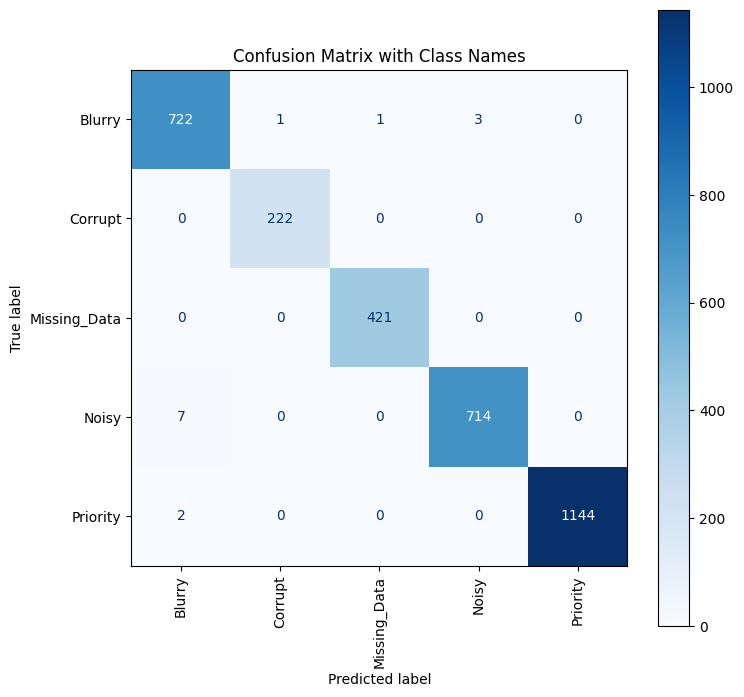

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Compute the confusion matrix
cm = confusion_matrix(val_labels, val_predictions)

# Plot the confusion matrix with class names
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Customize and display the plot
fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')  # Use a blue colormap
plt.title("Confusion Matrix with Class Names")
plt.show()

In [70]:
import gc

# Since we will no longer need the original training data (train_images), we can remove it from memory
del val_predictions, val_labels, val_images

# Force garbage collection to free up memory
gc.collect()

%reset -f
print("Data removed from memory.")

Data removed from memory.


In [71]:
import numpy as np
# first let us load the testing data
test_images = np.load('data/test_images.npy')      # Load image test data
test_labels = np.load('data/test_labels.npy')      # Load label test data

In [72]:
def preprocessing_fn_CNN(X):  # we did not use any preprocessing in notebook 4

    return X

In [73]:
from source.evaluate import evaluate_pipeline # A built-in function to evaluate a given ML pipeline by preprocessing, predicting, and calculating performance metrics.

In [74]:
import pickle

In [75]:
from keras.utils import to_categorical
test_labels = to_categorical(test_labels, num_classes=5)

# Load the CNN model from the 4th notebook
with open('cnn1_model.pkl', 'rb') as file:
    cnn_model = pickle.load(file)

102/102 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step

### Evaluation Metrics ###

Evaluation Time:       44.27 seconds (The time it took for the pipeline to preprocess data and make predictions.)
Peak Memory Usage:     9231.32 MB (The maximum memory used during evaluation.)
Average CPU Usage:     591.39 % (The % shows how much of one CPU core was used during the evaluation.)
Algorithm code size:         0.05 MB (The size of the trained model and preprocessing function.)
Accuracy:              0.994 (The percentage of correctly classified samples.)
F1 Score:              0.994 (A balance of precision and recall, useful for imbalanced datasets.)

### Confusion Matrix ###



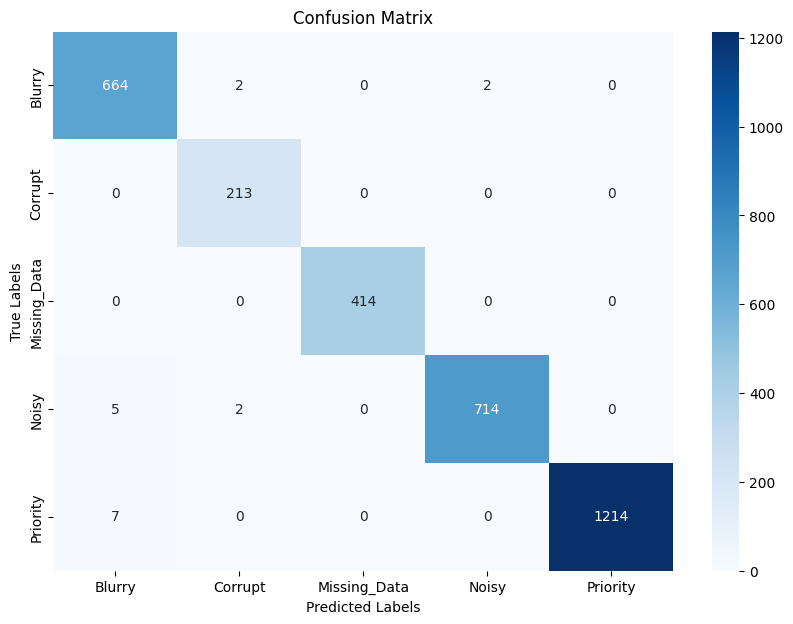

In [76]:
# Evaluate the pipeline
metrics = evaluate_pipeline(cnn_model, test_images, test_labels, preprocessing_fn_CNN)

### Evaluation Metrics Explanation

- **Evaluation Time**: 
  - **44.27 seconds** — This is the time it took for the entire evaluation process, from preprocessing the data to making predictions. It reflects how long the model took to process and evaluate the data.
  
- **Peak Memory Usage**:
  - **9231.32 MB** — This is the maximum amount of memory used during evaluation. It indicates the memory consumption peak while the model was evaluating the data.
  
- **Average CPU Usage**:
  - **591.39%** — This is a bit unusual because it shows how much of the CPU's capacity was used. The percentage indicates that the model utilized more than 5 full CPU cores, suggesting high parallel computation, likely because the model is processing large amounts of data simultaneously.
  
- **Algorithm Code Size**:
  - **0.05 MB** — The trained model and preprocessing function are very lightweight, with a small code size, making it efficient in terms of storage.
  
- **Accuracy**:
  - **0.994 (99.4%)** — This is a very high accuracy, meaning the model correctly classified 99.4% of all the samples in the dataset. It suggests the model has a strong performance overall.
  
- **F1 Score**:
  - **0.994 (99.4%)** — The F1 Score balances precision and recall, providing a harmonic mean of both. With an F1 score close to 1, it indicates the model performs well in both identifying positives (precision) and capturing all positive cases (recall). This is especially useful for imbalanced datasets, showing that the model is not biased toward one class over another.

### Summary:
This model evaluation shows excellent performance with very high accuracy and F1 score, which means the model is both accurate and well-balanced in its predictions. The relatively low memory usage and efficient processing time further demonstrate the model's effectiveness and efficiency.


### Model Comparison Table

| Metric               | Optimized Model                     | Base Model                          | What’s a Good Model?               |
|----------------------|--------------------------------------|-------------------------------------|------------------------------------|
| **Evaluation Time**   | 44.27 seconds                        | 265.27 seconds                      | Lower time is preferred for faster processing. Optimized model performs better here. |
| **Peak Memory Usage** | 9231.32 MB                          | 8455.79 MB                          | Lower memory usage is ideal for efficiency. Base model uses less memory, so it’s better in this case. |
| **Average CPU Usage** | 591.39%                             | 89.29%                              | High CPU usage can indicate better parallel processing. Optimized model uses more CPU, which may indicate a more complex process, but better performance. |
| **Algorithm Code Size** | 0.05 MB                            | 1.16 MB                             | Smaller code size is preferred for easier deployment. Optimized model has much smaller code size. |
| **Accuracy**          | 99.4%                                | 99.8%                               | Higher accuracy is generally better. Base model slightly outperforms the optimized model in this case. |
| **F1 Score**          | 99.4%                                | 99.8%                               | Higher F1 score shows better balance between precision and recall. Base model slightly outperforms the optimized model here as well. |

### Summary:
- **Base Model**: It is slightly better in accuracy and F1 score, though the time taken and memory usage are higher. It's a more straightforward approach but takes longer and uses more resources.
- **Optimized Model**: It performs faster, uses less memory, and is more efficient with smaller code size. However, it sacrifices a bit of accuracy and F1 score.


In [ ]:
!pwd

In [ ]:
!ls